# **Predicting Outcomes of Baseball Games Using Machine Learning Approaches**

## **By: Mike Delevan**
## **October 10, 2019**

### **Initial Loading of the Data**

Initially, Java was used to pre-process the data but it was later discovered that this would be more work than if I did it in Python. The Java program first took in the raw data year-by-year and created csv files with headers for each team's data in that year. The decision to use Java was made because I thought I would later use it for web scraping. However, after some consideration I decided to do my entire project in Python instead of Java, Python, and C#. The raw data can be downloaded from [Retrosheet](https://www.retrosheet.org/). This project utilizes the game logs from the 2010-2018 seasons.

Since the Java program split the data into year by year files for each team, it would be necessary to combine them back into one file for one team. This could've been done with only one file using Python but because I split it into multiple files, I am restricted in the initial loading of the data. So let's combine all of these files into one dataframe and save it as a csv under team_name_All.csv. 


In [2]:
import pandas as pd
import os

os.chdir('C:\\Users\\Mike Delevan\\Documents\\gl2010_18')

teamAbbr = ["CHN","PHI","PIT", "CIN", "SLN", "BOS", "CHA",
                "CLE", "DET", "NYA", "BAL", "LAN", "SFN", "MIN",
                "HOU", "NYN", "ATL", "OAK", "KCA", "SDN", "TEX",
                "TOR", "SEA", "FLO", "COL", "ANA", "TBA", "ARI",
                "MIL", "WAS"]

for x in range(30):
        all_filenames = []
        for y in range(2010,2019):
            all_filenames.append(teamAbbr[x] + str(y) + ".csv")
            #print(all_filenames)

        if(os.path.isfile(teamAbbr[x]+ '_All.csv')):
            print("File has already been created!")
        else:
            combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])
            combined_csv.to_csv(teamAbbr[x]+ "_All.csv", index=False, encoding='utf-8-sig')

        try:
            data = pd.read_csv(teamAbbr[x] + '_All.csv')
            data.drop(['Visiting Team Line Numbers', 'Home Team Line Numbers'],axis=1, inplace=True)
            data.to_csv(teamAbbr[x] + '_All.csv', index=False)

        except KeyError:
            print("These columns are not in the file!")


c:\users\mike delevan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Now that the files have been combined let's load one in and discover some general info about the data.

In [3]:
marlins = pd.read_csv('FLO_All.csv')
marlins.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 74 columns):
Date                                          1456 non-null int64
Visting Team                                  1456 non-null object
League                                        1456 non-null object
Visiting Team Game Number                     1456 non-null int64
Home Team                                     1456 non-null object
League.1                                      1456 non-null object
Home Team Game Number                         1456 non-null int64
Visiting Team Score                           1456 non-null int64
Home Team Score                               1456 non-null int64
Length of Game in Outs                        1456 non-null int64
Park ID                                       1456 non-null object
Attendance                                    1456 non-null int64
Visting Team At-Bats                          1456 non-null int64
Visting Team Hits             

Now that's a lot of columns to handle! Each row has data for both the home team and the away team, but with further processing we will only include the relevant data for the team in the filename! Let's see how many rows are in a single team's data file:

In [4]:
marlins.shape[0]

1456

So in total each team will have around 1450 rows in their data file along with 82 columns with a mix of floats, integers, and object variables. Many of these columns will be dropped because they will be deemed not relevant to predicting the winner of a game.

Now that we know the general form of the data we can get into the data wrangling portion of the project. Let's look at the Marlins data because they had changed their name and abbreviation in 2012:

In [5]:
marlins = pd.read_csv('FLO_All.csv')
marlins.head(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
0,20100405,FLO,NL,1,NYN,NL,1,1,7,51,...,1,0,0,0,santj003,johnj009,NaN,johnj009,santj003,NaN
1,20100407,FLO,NL,2,NYN,NL,2,7,6,60,...,0,0,0,0,nunel001,takah001,woodt003,nolar001,mainj001,NaN
2,20100408,FLO,NL,3,NYN,NL,3,3,1,54,...,0,0,1,0,roben001,niesj001,nunel001,roben001,niesj001,NaN
3,20100409,LAN,NL,4,FLO,NL,4,7,3,54,...,2,0,0,0,kuroh001,volsc001,NaN,kuroh001,volsc001,NaN
4,20100410,LAN,NL,5,FLO,NL,5,6,7,52,...,2,0,1,0,veraj001,sherg001,NaN,padiv001,johnj009,NaN
5,20100411,LAN,NL,6,FLO,NL,6,5,6,51,...,2,0,0,0,hensc002,weavj002,nunel001,haegc001,sanca004,NaN
6,20100412,CIN,NL,7,FLO,NL,7,6,5,60,...,1,0,1,0,massn001,badeb001,cordf002,cuetj001,nolar001,NaN
7,20100413,CIN,NL,8,FLO,NL,8,10,8,66,...,1,0,2,0,owinm001,meyed002,cordf002,arrob001,roben001,NaN
8,20100414,CIN,NL,9,FLO,NL,9,3,5,51,...,0,0,0,0,volsc001,bailh001,badeb001,bailh001,volsc001,NaN
9,20100415,CIN,NL,10,FLO,NL,10,2,10,51,...,1,0,0,0,johnj009,haraa001,NaN,haraa001,johnj009,NaN


Seems all fine and dandy here doesn't it? Let's take a look at the most recent rows in the dataset:

In [6]:
marlins.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
1446,20180920,CIN,NL,154,MIA,NL,152,4,2,54,...,1,0,2,0,reedc002,brigj002,igler001,reedc002,brigj002,NaN
1447,20180921,CIN,NL,155,MIA,NL,153,0,1,58,...,0,0,0,0,barrk002,hernd002,NaN,castl003,chenw001,NaN
1448,20180922,CIN,NL,156,MIA,NL,154,1,5,51,...,0,0,1,0,urenj001,desca001,stecd001,desca001,urenj001,NaN
1449,20180923,CIN,NL,157,MIA,NL,155,0,6,51,...,0,0,1,0,richt001,lorem002,NaN,lorem002,richt001,NaN
1450,20180924,MIA,NL,156,WAS,NL,157,3,7,51,...,2,0,0,0,millj006,alcas001,NaN,alcas001,stras001,NaN
1451,20180925,MIA,NL,157,WAS,NL,158,4,9,51,...,2,0,0,0,schem001,brigj002,NaN,brigj002,schem001,NaN
1452,20180926,MIA,NL,158,WAS,NL,159,3,9,42,...,0,0,0,0,suerw002,chenw001,NaN,chenw001,mcgok002,NaN
1453,20180928,MIA,NL,159,NYN,NL,160,8,1,54,...,3,0,1,0,urenj001,sewap001,NaN,urenj001,oswac001,NaN
1454,20180929,MIA,NL,160,NYN,NL,161,0,1,76,...,0,0,1,0,zamod001,garcj006,NaN,richt001,matzs001,NaN
1455,20180930,MIA,NL,161,NYN,NL,162,0,1,51,...,0,0,1,0,syndn001,alcas001,NaN,alcas001,syndn001,NaN


So, it seems as though during the course of 8 years the marlins decided to change their name and their abbreviation from **FLO** to **MIA** just to inconvenience this project in 2019. Let's fix those rows so that they are all consistent with each other

In [7]:
marlins.loc[(marlins['Home Team'] == "MIA"), 'Home Team'] = "FLO"
marlins.loc[(marlins['Visting Team'] == "MIA"), 'Visting Team'] = "FLO"

Now lets check the oldest rows in the data:

In [8]:
marlins.head(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
0,20100405,FLO,NL,1,NYN,NL,1,1,7,51,...,1,0,0,0,santj003,johnj009,NaN,johnj009,santj003,NaN
1,20100407,FLO,NL,2,NYN,NL,2,7,6,60,...,0,0,0,0,nunel001,takah001,woodt003,nolar001,mainj001,NaN
2,20100408,FLO,NL,3,NYN,NL,3,3,1,54,...,0,0,1,0,roben001,niesj001,nunel001,roben001,niesj001,NaN
3,20100409,LAN,NL,4,FLO,NL,4,7,3,54,...,2,0,0,0,kuroh001,volsc001,NaN,kuroh001,volsc001,NaN
4,20100410,LAN,NL,5,FLO,NL,5,6,7,52,...,2,0,1,0,veraj001,sherg001,NaN,padiv001,johnj009,NaN
5,20100411,LAN,NL,6,FLO,NL,6,5,6,51,...,2,0,0,0,hensc002,weavj002,nunel001,haegc001,sanca004,NaN
6,20100412,CIN,NL,7,FLO,NL,7,6,5,60,...,1,0,1,0,massn001,badeb001,cordf002,cuetj001,nolar001,NaN
7,20100413,CIN,NL,8,FLO,NL,8,10,8,66,...,1,0,2,0,owinm001,meyed002,cordf002,arrob001,roben001,NaN
8,20100414,CIN,NL,9,FLO,NL,9,3,5,51,...,0,0,0,0,volsc001,bailh001,badeb001,bailh001,volsc001,NaN
9,20100415,CIN,NL,10,FLO,NL,10,2,10,51,...,1,0,0,0,johnj009,haraa001,NaN,haraa001,johnj009,NaN


Now let's check the most recent rows in the data:

In [9]:
marlins.tail(10)

,Date,Visting Team,League,Visiting Team Game Number,Home Team,League.1,Home Team Game Number,Visiting Team Score,Home Team Score,Length of Game in Outs,...,Home Team Errors,Home Team Passed Balls,Home Team Double Plays,Home Team Triple Plays,Winning Pitcher ID,Losing Pitcher ID,Saving Pitcher ID,Visiting Starter Pitcher ID,Home Starter Pitcher ID,Unnamed: 75
1446,20180920,CIN,NL,154,FLO,NL,152,4,2,54,...,1,0,2,0,reedc002,brigj002,igler001,reedc002,brigj002,NaN
1447,20180921,CIN,NL,155,FLO,NL,153,0,1,58,...,0,0,0,0,barrk002,hernd002,NaN,castl003,chenw001,NaN
1448,20180922,CIN,NL,156,FLO,NL,154,1,5,51,...,0,0,1,0,urenj001,desca001,stecd001,desca001,urenj001,NaN
1449,20180923,CIN,NL,157,FLO,NL,155,0,6,51,...,0,0,1,0,richt001,lorem002,NaN,lorem002,richt001,NaN
1450,20180924,FLO,NL,156,WAS,NL,157,3,7,51,...,2,0,0,0,millj006,alcas001,NaN,alcas001,stras001,NaN
1451,20180925,FLO,NL,157,WAS,NL,158,4,9,51,...,2,0,0,0,schem001,brigj002,NaN,brigj002,schem001,NaN
1452,20180926,FLO,NL,158,WAS,NL,159,3,9,42,...,0,0,0,0,suerw002,chenw001,NaN,chenw001,mcgok002,NaN
1453,20180928,FLO,NL,159,NYN,NL,160,8,1,54,...,3,0,1,0,urenj001,sewap001,NaN,urenj001,oswac001,NaN
1454,20180929,FLO,NL,160,NYN,NL,161,0,1,76,...,0,0,1,0,zamod001,garcj006,NaN,richt001,matzs001,NaN
1455,20180930,FLO,NL,161,NYN,NL,162,0,1,51,...,0,0,1,0,syndn001,alcas001,NaN,alcas001,syndn001,NaN


Thankfully, no other team decided to have an identity crisis over the past few years! Go every other team in the MLB!

Let's make the team abbreviation constant over all team files! (Note: This is all done in one loop in the actual python file but for the sake of this notebook I've broken it up!)

In [10]:
for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    
    data.loc[(data['Home Team'] == "MIA"), 'Home Team'] = "FLO"
    data.loc[(data['Visting Team'] == "MIA"), 'Visting Team'] = "FLO"
    
    data.to_csv(teamAbbr[x] + '_All.csv', index=False)

### **Calculating some meaningful statistics**

Now that each team has their own file with all of their games, we can now calculate meaningful statistics from their perspective! Currently I have calculated batting average, slugging percentage, on-base percentage, and on-base plus slugging percentage. More statistics will be calculated at a later date and the list of statistics to-do will be found at the end of this notebook. 

Lets see how the calculations were done:

First let's calcute the team's Batting Average (We will use the San Francisco Giants for this!):

The formula for BA is:
### $ \frac {Hits (H)}{At-Bats (AB)} $


In [11]:
giants = pd.read_csv('SFN_All.csv')

giants['Visiting Team Batting Average'] = giants['Visting Team Hits'] / giants['Visting Team At-Bats']
giants['Home Team Batting Average'] = giants['Home Team Hits'] / giants['Home Team At-Bats']
                                                                     

Before this, I had a different formula that removed sac hits, sac flys, HBP, walks, and intentional walks from the at-bat values because I read that those didn't count towards ** *Official* ** at-bats. After some research I found that batting average rarely ever goes above .400 but when checking my files I found a lot of values above .400 and even .500 which I found odd. After checking my calculated BA values with the true values on [Baseball-Reference](https://www.baseball-reference.com/) I found the calculations were off and decided to use the formula above.

Let's check to see if the values are now in the dataframe:

In [12]:
giants.tail(10)

,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Visting Team Stolen Bases,Visting Team Strikeouts,Visting Team Team ER,Visting Team Triple Plays,Visting Team Triples,Visting Team Walks,Visting Team Wild Pitches,Winning Pitcher ID,Visiting Team Batting Average,Home Team Batting Average
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,0,6,8,0,0,3,0,erlir001,0.235294,0.312500
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,0,16,5,0,0,5,1,brebj001,0.235294,0.323529
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,1,9,5,0,0,3,0,martc006,0.275000,0.228571
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,0,11,9,0,0,0,0,mikom001,0.147059,0.352941
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,0,6,0,0,0,2,0,mitcb001,0.307692,0.212121
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,1,11,4,0,0,6,0,melam001,0.260870,0.204545
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,1,10,2,0,2,1,0,diazm004,0.235294,0.161290
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,1,10,1,0,0,1,0,ryu-h001,0.257143,0.206897
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,2,6,6,0,2,7,1,wooda002,0.409091,0.264706
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,0,6,0,0,1,5,0,hillr001,0.400000,0.068966


As you can see in the last two columns, the BA for both teams in the game have been calculated! Onto the next statistic!

Let's calculate a team's on-base-percentage using the formula:

### $ \frac {Hits~(H)~+~Walks~(BB)~+~Hit-by-Pitch~(HBP)}{At-Bats~(AB)~+~Walks~(BB)~+~Hit-by-Pitch~(HBP)~+~Sac Flys~(SF)} $

In [13]:
giants['Visiting Team OBP'] = (giants['Visting Team Hits'] + giants['Visting Team Walks'] + giants['Visting Team HBP']) / (giants['Visting Team At-Bats'] + giants['Visting Team Walks'] + giants['Visting Team HBP'] + giants['Visting Team Sac Flys'])
giants['Home Team OBP'] = (giants['Home Team Hits'] + giants['Home Team Walks'] + giants['Home Team HBP']) / (giants['Home Team At-Bats'] + giants['Home Team Walks'] + giants['Home Team HBP'] + giants['Home Team Sac Flys'])

giants.tail(10)


,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Visting Team Team ER,Visting Team Triple Plays,Visting Team Triples,Visting Team Walks,Visting Team Wild Pitches,Winning Pitcher ID,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,8,0,0,3,0,erlir001,0.235294,0.312500,0.297297,0.342857
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,5,0,0,5,1,brebj001,0.235294,0.323529,0.333333,0.361111
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,5,0,0,3,0,martc006,0.275000,0.228571,0.325581,0.250000
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,9,0,0,0,0,mikom001,0.147059,0.352941,0.147059,0.435897
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,0,0,0,2,0,mitcb001,0.307692,0.212121,0.341463,0.277778
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,4,0,0,6,0,melam001,0.260870,0.204545,0.346154,0.204545
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,2,0,2,1,0,diazm004,0.235294,0.161290,0.250000,0.257143
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,1,0,0,1,0,ryu-h001,0.257143,0.206897,0.277778,0.303030
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,6,0,2,7,1,wooda002,0.409091,0.264706,0.490196,0.277778
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,0,0,1,5,0,hillr001,0.400000,0.068966,0.468085,0.068966


Let's calculate a team's slugging percentage using the formula:

### $ \frac {Singles~(1B)~+~2~*~Doubles~(2B)~+~3~*~Triples~(3B)~+~4~*~Homeruns~(HR)}{At-Bats~(AB)} $

In [14]:
giants['Visiting Team Slugging'] = ((giants['Visting Team Hits'] - giants['Visting Team Doubles'] - giants['Visting Team Triples'] - giants['Visting Team Home-Runs']) + (giants['Visting Team Doubles'] * 2) + (giants['Visting Team Triples'] * 3) + (giants['Visting Team Home-Runs'] * 4)) / (giants['Visting Team At-Bats'])
giants['Home Team Slugging'] = ((giants['Home Team Hits'] - giants['Home Team Doubles'] - giants['Home Team Triples'] - giants['Home Team Home-Runs']) + (giants['Home Team Doubles'] * 2) + (giants['Home Team Triples'] * 3) + (giants['Home Team Home-Runs'] * 4)) / (giants['Home Team At-Bats'])

giants.tail(10)

,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Visting Team Triples,Visting Team Walks,Visting Team Wild Pitches,Winning Pitcher ID,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,0,3,0,erlir001,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,0,5,1,brebj001,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,0,3,0,martc006,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,0,0,0,mikom001,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,0,2,0,mitcb001,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,0,6,0,melam001,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,2,1,0,diazm004,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,0,1,0,ryu-h001,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,2,7,1,wooda002,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,1,5,0,hillr001,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966


You're probably asking yourself why the formula is so long in the above cell. This is because the original form of the data did not have a "Single" column so I had to calculate it by subtracting the number of doubles, triples, and homeruns.

Another interesting thing happened during this step, I got a warning saying 'TypeError: unsupported operand type(s) for -: 'int' and 'str'' which I thought was strange. After some investigation into my files I found that some lines had information that was offset by about 3 cells. Below is a snippet of what this offset looks like. What happens is that a game will get suspended and restarted on a different day. Retrosheet documents this restart by adding in 3 new indeces into their data, thus throwing off my Java parser.

In [17]:
from IPython.display import Image
Image(filename='C://Users//Mike Delevan//Desktop//Wallpapers//Random//Error1.jpg')

You might be wondering how I solved this small little error? No, I didn't do it cleanly and programmatically I couldn't figure it out. Instead I combed through 46,000 rows and manually deleted the rows with this error in it. Out of the 46,000 rows I encountered only about 30 rows had the error, go figure.

Now that the slugging percentage and the on base percentage has been calculated, we can now calculate on base plus slugging percentage using the formula:

### ${On~Base~Percentage~(OBP)}~+~{Slugging~Percentage~(SLG)} $

In [18]:
giants['Visiting Team OPS'] = giants['Visiting Team OBP'] + giants['Visiting Team Slugging']
giants['Home Team OPS'] = giants['Home Team OBP'] + giants['Home Team Slugging']

giants.tail(10)

,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Visting Team Wild Pitches,Winning Pitcher ID,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,0,erlir001,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,1,brebj001,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,0,martc006,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,0,mikom001,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,0,mitcb001,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,0,melam001,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,0,diazm004,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,0,ryu-h001,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,1,wooda002,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,0,hillr001,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931


Next we will determine whether the team won this game or not. Here we have to check whether they were the home team or the away team and then determine the winner:

In [19]:
giants.loc[(giants['Home Team'] == 'SFN') & (giants['Home Team Score'] > giants['Visiting Team Score']), 'Win'] = 1

giants.loc[(giants['Visting Team'] == 'SFN') & (giants['Visiting Team Score'] > giants['Home Team Score']), 'Win'] = 1

giants.loc[(giants['Home Team'] == 'SFN') & (giants['Home Team Score'] < giants['Visiting Team Score']), 'Win'] = 0

giants.loc[(giants['Visting Team'] == 'SFN') & (giants['Visiting Team Score'] < giants['Home Team Score']), 'Win'] = 0

giants.tail(10)

,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Winning Pitcher ID,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS,Win
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,erlir001,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107,0.0
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,brebj001,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876,0.0
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,martc006,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571,0.0
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,mikom001,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309,0.0
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,mitcb001,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202,0.0
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,melam001,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182,1.0
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,diazm004,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207,0.0
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,ryu-h001,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375,0.0
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,wooda002,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719,0.0
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,hillr001,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931,0.0


Finally (for now) we will determine if the given team has won their last game. This will require us to look back a row and determine if they won the game in that row:

In [20]:
giants.loc[(giants['Home Team'].shift() == 'SFN') & (giants['Home Team Score'].shift() > giants['Visiting Team Score'].shift()), 'wonPrev'] = 1
giants.loc[(giants['Home Team'].shift() == 'SFN') & (giants['Home Team Score'].shift() < giants['Visiting Team Score'].shift()), 'wonPrev'] = 0

giants.loc[(giants['Visting Team'].shift() == 'SFN') & (giants['Visiting Team Score'].shift() > giants['Home Team Score'].shift()), 'wonPrev'] = 1
giants.loc[(giants['Visting Team'].shift() == 'SFN') & (giants['Visiting Team Score'].shift() < giants['Home Team Score'].shift()), 'wonPrev'] = 0

giants.tail(10)

,Attendance,Date,Home Starter Pitcher ID,Home Team,Home Team Assists,Home Team At-Bats,Home Team Awarded First on Interference,Home Team Balks,Home Team Caught Stealing,Home Team Double Plays,...,Visiting Team Batting Average,Home Team Batting Average,Visiting Team OBP,Home Team OBP,Visiting Team Slugging,Home Team Slugging,Visiting Team OPS,Home Team OPS,Win,wonPrev
1446,31933,20180919,erlir001,SDN,11,32,0,0,0,2,...,0.235294,0.312500,0.297297,0.342857,0.352941,0.531250,0.650238,0.874107,0.0,1.0
1447,45892,20180921,gantj002,SLN,5,34,0,0,0,0,...,0.235294,0.323529,0.333333,0.361111,0.323529,0.411765,0.656863,0.772876,0.0,0.0
1448,45878,20180922,waina001,SLN,10,35,0,0,0,0,...,0.275000,0.228571,0.325581,0.250000,0.300000,0.428571,0.625581,0.678571,0.0,0.0
1449,46596,20180923,mikom001,SLN,5,34,0,0,0,0,...,0.147059,0.352941,0.147059,0.435897,0.264706,0.529412,0.411765,0.965309,0.0,0.0
1450,35428,20180924,holld003,SFN,10,33,0,0,0,0,...,0.307692,0.212121,0.341463,0.277778,0.435897,0.242424,0.777361,0.520202,0.0,0.0
1451,36063,20180925,strac001,SFN,19,44,0,0,1,2,...,0.260870,0.204545,0.346154,0.204545,0.347826,0.363636,0.693980,0.568182,1.0,0.0
1452,36044,20180926,kellc001,SFN,8,31,0,1,1,0,...,0.235294,0.161290,0.250000,0.257143,0.470588,0.258065,0.720588,0.515207,0.0,1.0
1453,41167,20180928,bumgm001,SFN,6,29,0,0,0,2,...,0.257143,0.206897,0.277778,0.303030,0.371429,0.310345,0.649206,0.613375,0.0,0.0
1454,41768,20180929,rodrd001,SFN,6,34,0,0,1,2,...,0.409091,0.264706,0.490196,0.277778,0.704545,0.352941,1.194742,0.630719,0.0,0.0
1455,41280,20180930,suara002,SFN,12,29,0,0,0,2,...,0.400000,0.068966,0.468085,0.068966,0.800000,0.068966,1.268085,0.137931,0.0,0.0


Let's apply this to all files in the dataset:

In [21]:
for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    
    data['Visiting Team Batting Average'] = data['Visting Team Hits'] / (data['Visting Team At-Bats'])
    data['Home Team Batting Average'] = data['Home Team Hits'] / (data['Home Team At-Bats'])
    data['Visiting Team OBP'] = (data['Visting Team Hits'] + data['Visting Team Walks'] + data['Visting Team HBP']) / (data['Visting Team At-Bats'] + data['Visting Team Walks'] + data['Visting Team HBP'] + data['Visting Team Sac Flys'])
    data['Home Team OBP'] = (data['Home Team Hits'] + data['Home Team Walks'] + data['Home Team HBP']) / (data['Home Team At-Bats'] + data['Home Team Walks'] + data['Home Team HBP'] + data['Home Team Sac Flys'])
    data['Visiting Team Slugging'] = ((data['Visting Team Hits'] - data['Visting Team Doubles'] - data['Visting Team Triples'] - data['Visting Team Home-Runs']) + (data['Visting Team Doubles'] * 2) + (data['Visting Team Triples'] * 3) + (data['Visting Team Home-Runs'] * 4)) / (data['Visting Team At-Bats'])
    data['Home Team Slugging'] = ((data['Home Team Hits'] - data['Home Team Doubles'] - data['Home Team Triples'] - data['Home Team Home-Runs']) + (data['Home Team Doubles'] * 2) + (data['Home Team Triples'] * 3) + (data['Home Team Home-Runs'] * 4)) / (data['Home Team At-Bats'])

    data['Visiting Team OPS'] = data['Visiting Team OBP'] + data['Visiting Team Slugging']
    data['Home Team OPS'] = data['Home Team OBP'] + data['Home Team Slugging']


    #Determining if teamAbb[x] won the game
    data.loc[(data['Home Team'] == teamAbbr[x]) & (data['Home Team Score'] > data['Visiting Team Score']), 'Win'] = 1

    data.loc[(data['Visting Team'] == teamAbbr[x]) & (data['Visiting Team Score'] > data['Home Team Score']), 'Win'] = 1

    data.loc[(data['Home Team'] == teamAbbr[x]) & (data['Home Team Score'] < data['Visiting Team Score']), 'Win'] = 0

    data.loc[(data['Visting Team'] == teamAbbr[x]) & (data['Visiting Team Score'] < data['Home Team Score']), 'Win'] = 0

    # Determining if teamAbbr[x] won their previous game
    data.loc[(data['Home Team'].shift() == teamAbbr[x]) & (data['Home Team Score'].shift() > data['Visiting Team Score'].shift()), 'wonPrev'] = 1
    data.loc[(data['Home Team'].shift() == teamAbbr[x]) & (data['Home Team Score'].shift() < data['Visiting Team Score'].shift()), 'wonPrev'] = 0

    data.loc[(data['Visting Team'].shift() == teamAbbr[x]) & (data['Visiting Team Score'].shift() > data['Home Team Score'].shift()), 'wonPrev'] = 1
    data.loc[(data['Visting Team'].shift() == teamAbbr[x]) & (data['Visiting Team Score'].shift() < data['Home Team Score'].shift()), 'wonPrev'] = 0
    
    data.to_csv(teamAbbr[x] + '_All.csv', index=False)

After all the data has been processed and meaningful statistics have been calculated, I intended to process the data further so that each row just contained statistics for the team listed in the file name. All I would have to do is to iterate through the rows in the original dataframe and extract the information I need whether the team is the home team or the visiting team.

In [22]:
def fillTeamDF(data, final, teamAbbr):

    for (idx, row) in data.iterrows():
        if(row.loc['Home Team'] == teamAbbr):
            final.loc[idx+1] = [teamAbbr, row['League.1'], row['Home Team Score'], 1, row['Home Team At-Bats'], row['Home Team Hits'], row['Home Team Doubles'],
                               row['Home Team Triples'], row['Home Team Home-Runs'], row['Home Team RBI'], row['Home Team Walks'], row['Home Team Strikeouts'],
                               row['Home Team LOB'], row['Home Team Pitchers Used'], row['Home Team Ind ER'], row['Home Team Team ER'], row['Home Team Errors'],
                               row['Home Team Batting Average'], row['Home Team OBP'], row['Home Team Slugging'], row['Home Team OPS'], row['Win'], row['wonPrev'] ]

        else:
            final.loc[idx+1] = [teamAbbr, row['League'], row['Visiting Team Score'], 0, row['Visting Team At-Bats'],
                              row['Visting Team Hits'], row['Visting Team Doubles'],
                              row['Visting Team Triples'], row['Visting Team Home-Runs'], row['Visting Team RBI'],
                              row['Visting Team Walks'], row['Visting Team Strikeouts'],
                              row['Visiting Team LOB'], row['Visting Team Pitchers Used'], row['Visting Team Ind ER'],
                              row['Visting Team Team ER'], row['Visting Team Errors'],
                              row['Visiting Team Batting Average'], row['Visiting Team OBP'], row['Visiting Team Slugging'],
                              row['Visiting Team OPS'], row['Win'], row['wonPrev']]

    final.to_csv(teamAbbr + '_Full.csv', index=False)

for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_All.csv')
    final = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'wonPrev'])
    fillTeamDF(data, final, teamAbbr[x])

final.tail(10)

,teamAbbr,League,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,wonPrev
1446,WAS,NL,4,1,44,9,2,0,1,4,...,8,5,5,0,0.204545,0.285714,0.318182,0.603896,0.0,1.0
1447,WAS,NL,2,1,30,6,1,0,0,2,...,4,3,3,1,0.200000,0.242424,0.233333,0.475758,0.0,0.0
1448,WAS,NL,6,1,30,7,4,0,2,6,...,5,0,0,0,0.233333,0.342857,0.566667,0.909524,1.0,0.0
1449,WAS,NL,6,1,38,11,2,1,1,6,...,7,8,8,0,0.289474,0.413043,0.473684,0.886728,0.0,1.0
1450,WAS,NL,7,1,31,9,3,0,3,7,...,5,2,2,2,0.290323,0.394737,0.677419,1.072156,1.0,0.0
1451,WAS,NL,9,1,32,11,4,0,1,9,...,4,3,3,2,0.343750,0.500000,0.562500,1.062500,1.0,1.0
1452,WAS,NL,9,1,33,12,3,0,1,8,...,4,3,3,0,0.363636,0.447368,0.545455,0.992823,1.0,1.0
1453,WAS,NL,2,0,38,12,2,1,0,2,...,5,5,5,0,0.315789,0.333333,0.421053,0.754386,0.0,1.0
1454,WAS,NL,12,0,43,18,2,1,2,12,...,5,2,2,1,0.418605,0.468085,0.651163,1.119248,1.0,0.0
1455,WAS,NL,0,0,28,5,2,0,0,0,...,5,12,12,0,0.178571,0.281250,0.250000,0.531250,0.0,1.0


Looks like this operation was a success! More stats will be added in the near future but for right now that's all I'll do with preprocessing the data for now.

To make data that will be used to predict the matches coming up I will calculate the 10 game averages for each team and put it in a file for the machine learning algorithms to use:


Let's load in one team's data just to mess around with:

In [23]:
data = pd.read_csv('NYA_Full.csv')
data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
data.tail(10)

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,wonPrev
1446,10,1,33,10,2,0,2,10,6,7,...,7,8,8,1,0.303030,0.410256,0.545455,0.955711,1.0,0.0
1447,3,1,37,7,3,0,2,3,4,10,...,7,1,1,1,0.189189,0.268293,0.432432,0.700725,1.0,1.0
1448,3,1,30,4,1,0,0,3,4,9,...,4,6,6,0,0.133333,0.228571,0.166667,0.395238,0.0,1.0
1449,4,0,34,8,4,0,1,4,3,8,...,8,1,1,1,0.235294,0.315789,0.441176,0.756966,1.0,0.0
1450,9,0,35,10,2,2,3,9,6,7,...,4,2,2,1,0.285714,0.395349,0.714286,1.109635,1.0,1.0
1451,7,0,37,10,0,0,1,7,4,12,...,6,6,6,2,0.270270,0.357143,0.351351,0.708494,0.0,1.0
1452,12,0,37,13,2,1,4,11,4,10,...,3,1,1,0,0.351351,0.395349,0.783784,1.179133,1.0,0.0
1453,11,0,41,13,3,0,4,10,4,9,...,4,5,5,1,0.317073,0.377778,0.682927,1.060705,1.0,1.0
1454,8,0,41,13,4,0,2,8,2,12,...,7,5,5,0,0.317073,0.348837,0.560976,0.909813,1.0,1.0
1455,2,0,30,4,1,0,1,2,3,15,...,7,6,6,3,0.133333,0.235294,0.266667,0.501961,0.0,1.0


Both league and team abbreviation are dropped because the describe function, which gets averages, cannot take an average of a categorical variable. These will get added back in

In [24]:
data['Team Abbr'] = "Team Abbr"
data.iloc[:0]

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,...,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,wonPrev,Team Abbr


Now that the header for the file is setup, lets get the descriptive statistics

In [25]:
data.tail(10).describe()

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,wonPrev
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.900000,0.300000,35.50000,9.200000,2.200000,0.300000,2.000000,6.70000,4.000000,9.900000,...,5.700000,4.100000,4.100000,1.000000,0.253566,0.333266,0.494572,0.827838,0.700000,0.700000
std,3.665151,0.483046,3.89444,3.425395,1.316561,0.674949,1.333333,3.40098,1.247219,2.514403,...,1.766981,2.601282,2.601282,0.942809,0.078015,0.067919,0.200300,0.260102,0.483046,0.483046
min,2.000000,0.000000,30.00000,4.000000,0.000000,0.000000,0.000000,2.00000,2.000000,7.000000,...,3.000000,1.000000,1.000000,0.000000,0.133333,0.228571,0.166667,0.395238,0.000000,0.000000
25%,3.250000,0.000000,33.25000,7.250000,1.250000,0.000000,1.000000,3.25000,3.250000,8.250000,...,4.000000,1.250000,1.250000,0.250000,0.200715,0.280167,0.371622,0.702667,0.250000,0.250000
50%,7.500000,0.000000,36.00000,10.000000,2.000000,0.000000,2.000000,7.50000,4.000000,9.500000,...,6.500000,5.000000,5.000000,1.000000,0.277992,0.352990,0.493316,0.833389,1.000000,1.000000
75%,9.750000,0.750000,37.00000,12.250000,3.000000,0.000000,2.750000,9.75000,4.000000,11.500000,...,7.000000,6.000000,6.000000,1.000000,0.313562,0.390956,0.652439,1.034456,1.000000,1.000000
max,12.000000,1.000000,41.00000,13.000000,4.000000,2.000000,4.000000,11.00000,6.000000,15.000000,...,8.000000,8.000000,8.000000,3.000000,0.351351,0.410256,0.783784,1.179133,1.000000,1.000000


I will now have to extract the values from the mean row and then append them to the averages file later.

In [26]:
description = data.tail(10).describe()
description.iloc[1:2]

,Score,isHomeTeam,atBats,Hits,Doubles,Triples,homeRuns,RBI,Walks,Strikeouts,...,pitchersUsed,indER,teamER,Errors,battingAverage,OBP,Slugging,OPS,Win,wonPrev
mean,6.9,0.3,35.5,9.2,2.2,0.3,2.0,6.7,4.0,9.9,...,5.7,4.1,4.1,1.0,0.253566,0.333266,0.494572,0.827838,0.7,0.7


Let's do this for all files and actually save it in a file

In [27]:
def write_averages(data, teamAbbr):
    if (os.path.isfile('team_averages.csv')):
        print("File has already been created!")
    else:
        avg_file = open("team_averages.csv", "w+")
        data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
        data.tail(10)
        data['Team Abbr'] = "Team Abbr"
        data.iloc[:0].to_csv('team_averages.csv', index=False, header=True)

    try:
        data.drop(['League', 'teamAbbr'], axis=1, inplace=True)
    except KeyError:
        print("Columns have already been deleted!")

    description = data.tail(10).describe()
    description['TeamAbbr'] = teamAbbr
    description.iloc[1:2].to_csv('team_averages.csv', index=False, header=False,mode='a')

for x in range(30):
    data = pd.read_csv(teamAbbr[x] + '_Full.csv')
    
    write_averages(data, teamAbbr[x])

Columns have already been deleted!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!
File has already been created!


This is not perfect though, I will have to replace the average for isHomeTeam because that value is basically a class value (1 or 0) so that will need to get changed in later versions of this project. Also because I am using averages to actually predict games, the system may need to be trained on averages too so this whole data pre-processing section may need to get reworked down the road.

Before the next section I'd like to do a little exploratory data analysis on the relationship between OPS and win classification:

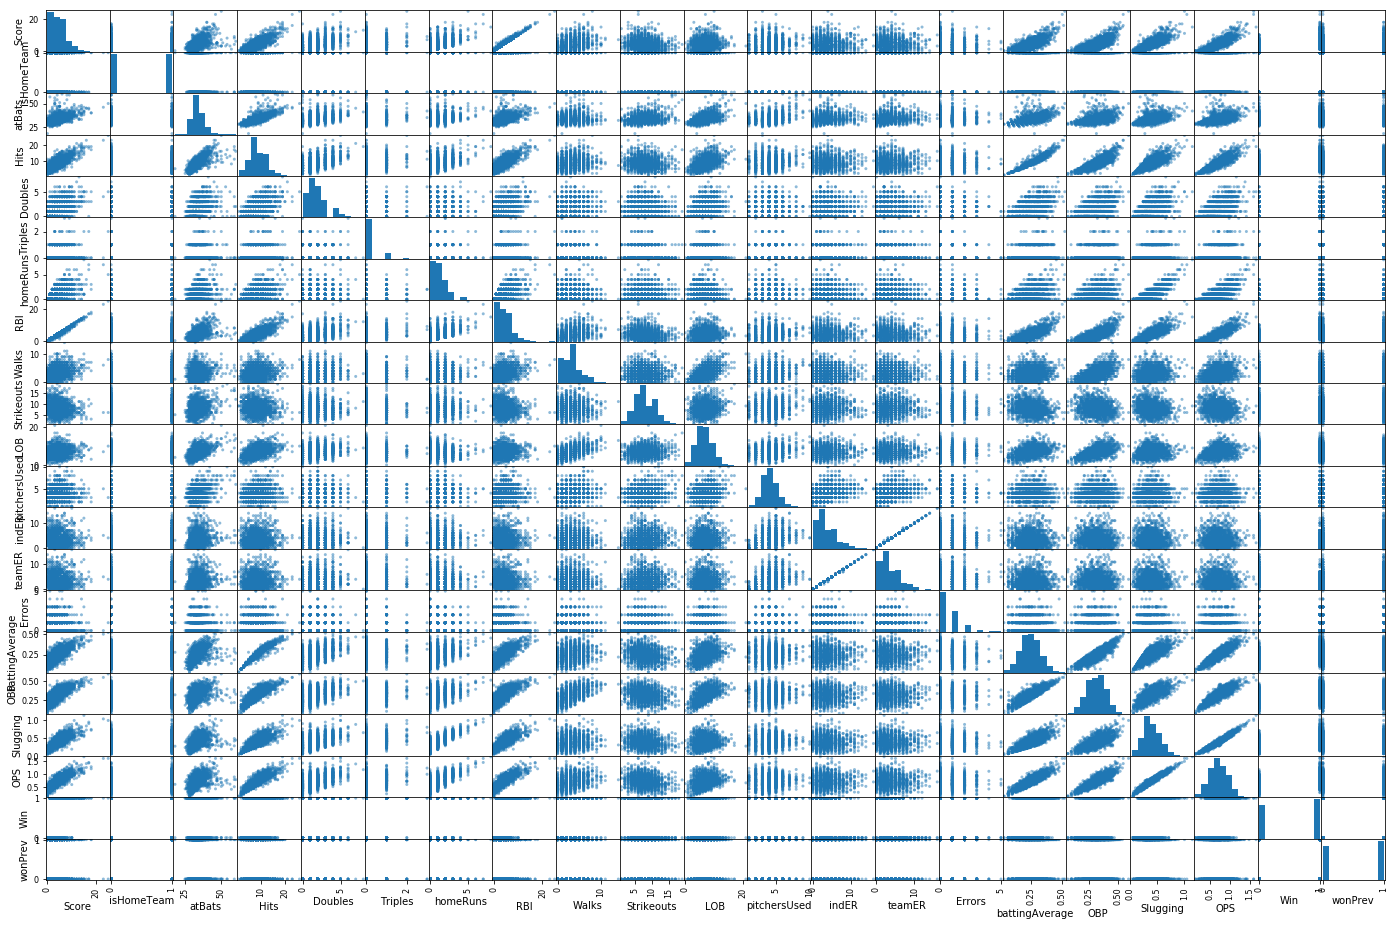

In [28]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt

scatter_matrix(data, figsize=(24,16))
plt.show()

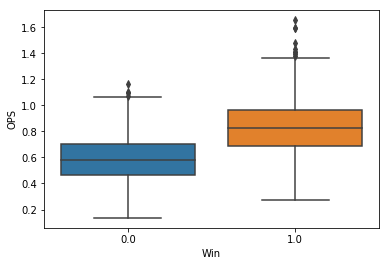

In [29]:
import seaborn as sns
sns.boxplot(x=data["Win"], y=data["OPS"] )

What can you infer by looking at this graph?

It seems as though if a team has a higher OPS they have a higer chance of winning. It will be interesting to see how machine learning algorithms will decipher this correlation.

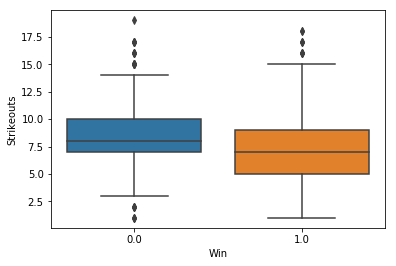

In [30]:
import seaborn as sns
sns.boxplot(x=data["Win"], y=data["Strikeouts"] )

What can you infer from this graph?

This might mean the more strikeouts a team has, the more likely they are to lose a game. Now to prove these hypotheses I would have to employ some statistical analysis to determine whether the difference between these two are statistically significant.

Next let's see how the average OPS of two teams changes over the course of a season:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

team1 = pd.read_csv('NYA_Full.csv')
team1Copy = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])

team1size = team1.shape[0]
y=0
for x in range(team1size - 162, team1size):
    
    team1Copy.loc[y+1] = team1.loc[x]
    y = y+1

avgArray = np.array([])
sum = 0
for (idx, row) in team1Copy.iterrows():
    sum = sum + row['OPS']
    average  = sum / (len(avgArray)+1)
    avgArray = np.append(avgArray, average)

team1Copy['OPSAverage'] = avgArray



team2 = pd.read_csv('NYN_Full.csv')
team2Copy = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])
team2size = team2.shape[0]
y=0
for x in range(team2size - 162, team2size):
    team2Copy.loc[y+1] = team2.loc[x]
    y = y+1

avgArray = np.array([])
sum = 0
for (idx, row) in team2Copy.iterrows():
    sum = sum + row['OPS']
    average  = sum / (len(avgArray)+1)
    avgArray = np.append(avgArray, average)

team2Copy['OPSAverage'] = avgArray



combined = pd.DataFrame(columns=['teamAbbr', 'League', 'Score', 'isHomeTeam', 'atBats', 'Hits',
                                      'Doubles', 'Triples', 'homeRuns', 'RBI', 'Walks', 'Strikeouts', 'LOB',
                                      'pitchersUsed', 'indER', 'teamER', 'Errors', 'battingAverage', 'OBP', 'Slugging',
                                      'OPS', 'Win', 'OPSAverage'])

combined = combined.append(team1Copy)
combined = combined.append(team2Copy)
color = ['blue', 'gray']
combined.groupby("teamAbbr")['OPSAverage'].plot(figsize=(24,7), legend=True, title='Average OPS during 2018 Season')
plt.xlabel('Game Number')
plt.ylabel('Average OPS')
plt.show()


NameError: name 'pd' is not defined

## *Statistics to be Calculated (TO-DO)*

- [Log5](https://sabr.org/research/matchup-probabilities-major-league-baseball)
- [Pythagorean Expectation](https://www.baseball-reference.com/bullpen/Pythagorean_Theorem_of_Baseball)
- [BABIP](https://library.fangraphs.com/pitching/babip/)
- [Earned Runs Average](https://library.fangraphs.com/pitching/era/)
- [Fielding Percentage](https://en.wikipedia.org/wiki/Fielding_percentage)
- [Walks and Hits Per Innings Pitched](https://library.fangraphs.com/pitching/whip/)
- [Runs Created](http://m.mlb.com/glossary/advanced-stats/runs-created)

### *References for more statistics:*
- https://www.sciencedaily.com/releases/2010/03/100301141852.htm
- https://sabr.org/research/new-formula-predict-teams-winning-percentage
- https://www.baltimoresun.com/sports/orioles/bs-sp-orioles-analytics-explainer-20180227-story.html
- http://m.mlb.com/glossary/advanced-stats